In [ ]:
#import keras libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [ ]:
#image preprocessing(or) image augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
#rescale => rescaling pixel value from 0 to 255 to 0 to 1
#shear_range=> counter clock wise rotation(anti clock)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
x_train = train_datagen.flow_from_directory("/content/drive/MyDrive/ibm project/TRAIN_SET",target_size=(64,64),batch_size=32,class_mode="binary")

Found 4118 images belonging to 5 classes.


In [ ]:
x_test = test_datagen.flow_from_directory("/content/drive/MyDrive/ibm project/TRAIN_SET",target_size=(64,64),batch_size=32,class_mode="binary")

Found 4118 images belonging to 5 classes.


In [ ]:
x_train.class_indices

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}

In [ ]:
#Initializing the model
model = Sequential()

In [ ]:
# addconvolution layer

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))
# 32 indicates => no of feature detectors
#(3,3)=> kernel size (feature detector size)

In [ ]:
# add Maxpooling layer

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
# add flatten layer => input to your ANN

In [ ]:
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# adding dense layer

In [ ]:
#hidden layer

In [ ]:
model.add(Dense(units=300,kernel_initializer="random_uniform",activation="relu"))

In [ ]:
model.add(Dense(units=200,kernel_initializer="random_uniform",activation="relu"))

In [ ]:
#output layer

In [ ]:
model.add(Dense(units=4,kernel_initializer="random_uniform",activation="softmax"))
len(x_train)

129

In [ ]:
#Ann starts so need to add dense layers

In [ ]:
model.add(Dense(units=128,activation="relu",kernel_initializer="random_uniform"))

In [ ]:
model.add(Dense(units=1,activation="sigmoid",kernel_initializer="random_uniform"))

In [ ]:
#Compile the model
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

In [ ]:
#Train the model

In [ ]:
model.fit_generator(x_train,steps_per_epoch=len(x_train), validation_data=x_test, validation_steps=len(x_test), epochs= 20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/20
129/129 [==============================] - 1049s 8s/step - loss: -0.0586 - accuracy: 0.3288 - val_loss: -1.1965 - val_accuracy: 0.3288
Epoch 2/20
129/129 [==============================] - 30s 234ms/step - loss: -2.7802 - accuracy: 0.3288 - val_loss: -4.7612 - val_accuracy: 0.3288
Epoch 3/20
129/129 [==============================] - 30s 234ms/step - loss: -7.7093 - accuracy: 0.3288 - val_loss: -11.3626 - val_accuracy: 0.3288
Epoch 4/20
129/129 [==============================] - 30s 232ms/step - loss: -15.6292 - accuracy: 0.3288 - val_loss: -20.5923 - val_accuracy: 0.3288
Epoch 5/20
129/129 [==============================] - 30s 235ms/step - loss: -26.4540 - accuracy: 0.3288 - val_loss: -33.0187 - val_accuracy: 0.3288
Epoch 6/20
129/129 [==============================] - 32s 249ms/step - loss: -40.1384 - accuracy: 0.3288 - val_loss: -47.9964 - val_accuracy: 0.3288
Epoch 7/20
129/129 [==============================] - 30s 234ms/step - loss: -56.4593 - accuracy: 0.3288 - val_l

In [ ]:
model.save("animal.h5")

In [30]:
#Prediction

In [31]:
from keras.models import load_model
import numpy as np
import cv2
model =load_model("animal.h5")

In [32]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
from skimage.transform import resize
def detect(frame):
    try:
        img = resize(frame,(64,64))
        img = np.expand_dims(img,axis=0)
        if(np.max(img)>1):
            img = img/255.0
        prediction = model.predict(img)
        print(prediction)
        prediction_class = model.predict_classes(img)
        print(prediction_class)
    except:
        print("shape not found")

In [34]:
frame = cv2.imread("cat.jpg")
data = detect(frame)

shape not found


In [35]:
frame = cv2.imread("rat.jpg")
data = detect(frame)

shape not found


In [36]:
from tensorflow.keras.models import load_model

In [37]:
from tensorflow.keras.preprocessing import image

In [38]:
model = load_model("animal.h5")

In [40]:
img = image.load_img("/content/drive/MyDrive/ibm project/rat.jpg",target_size=(64,64))

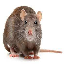

In [41]:
img